In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
datos1 = pd.read_csv('ejercicio_1.csv', sep=',')
datos2 = pd.read_csv('ejercicio_2.csv', sep=',')
datos3 = pd.read_csv('ejercicio_3.csv', sep=',')
datos4 = pd.read_csv('ejercicio_4.csv', sep=',')

In [245]:
datos1

,X,Y
0,-4.406280,-1.383344
1,-2.722675,3.918974
2,4.610505,3.513816
3,3.510524,1.139324
4,8.767744,4.575692
...,...,...
95,-3.938697,-3.316558
96,18.097452,14.914027
97,7.836851,6.051094
98,-7.145026,-7.592345


Funciones creadas para realizar los gráficos

In [246]:
def graficar(df, colA, colB, ejercicio):
    eje_x = []
    eje_y = []
    for index, row in df.iterrows():
        eje_x.append(row[colA])
        eje_y.append(row[colB])

    sns.scatterplot(x = eje_x, y = eje_y, color='skyblue', legend=False)
    plt.title('Scatter Plot ' + ejercicio)
    plt.xlabel('X')
    plt.ylabel('Y')

In [247]:
def graficar_recta(df, colA, colB, ejercicio):
    eje_x = df[colA].to_numpy()
    eje_y = df[colB].to_numpy()

    # Asegurarse de que tengan la misma longitud
    assert eje_x.shape == eje_y.shape

    # Agregar columna de 1s para incluir a beta 0
    X_matrix = np.column_stack((np.ones_like(eje_x), eje_x))

    # Usamos la fórmula obtenida en la primera parte
    beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ eje_y 

    intercepto = beta[0]
    pendiente = beta[1]

    sns.scatterplot(x = eje_x, y = eje_y, color='skyblue', legend=False)

    # Recta ajustada
    x_vals = np.linspace(eje_x.min(), eje_x.max(), 100)
    y_vals = intercepto + pendiente * x_vals
    plt.plot(x_vals, y_vals, color='red', label='Recta ajustada')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regresión lineal ' + ejercicio)
    plt.legend()
    plt.show()

In [248]:
def graficar_curva(df, colA, colB, ejercicio):
    eje_x = df[colA].to_numpy()
    eje_y = df[colB].to_numpy()

    assert eje_x.shape == eje_y.shape

    X_matrix = np.column_stack((np.ones_like(eje_x), eje_x, eje_x**2))

    beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ eje_y

    intercepto = beta[0]
    pendiente = beta[1]
    coef_cuadratico = beta[2]

    sns.scatterplot(x = eje_x, y = eje_y, color='skyblue', legend=False)

    # Curva ajustada
    x_vals = np.linspace(eje_x.min(), eje_x.max(), 100)
    y_vals = intercepto + pendiente * x_vals + coef_cuadratico * x_vals**2
    plt.plot(x_vals, y_vals, color='purple', label='Curva ajustada')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regresión cuadrática ' + ejercicio)
    plt.legend()
    plt.show()

In [249]:
def graficar_recta_polinomial(df, colA, colB, ejercicio, grado):
    eje_x = df[colA].to_numpy()
    eje_y = df[colB].to_numpy()

    # Asegurarse de que tengan la misma longitud
    assert eje_x.shape == eje_y.shape

    # Agregar columna de 1s y X^2, X^3, ..., X^grado
    X_matrix = np.column_stack([eje_x**i for i in range(grado+1)])

    # Cálculo de los coeficientes (beta_0, beta_1, ..., beta_grado)
    beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ eje_y

    # Predicción de la curva ajustada
    x_vals = np.linspace(eje_x.min(), eje_x.max(), 100)
    X_vals_matrix = np.column_stack([x_vals**i for i in range(grado+1)])
    y_vals = X_vals_matrix @ beta

    sns.scatterplot(x = eje_x, y = eje_y, color='skyblue', legend=False)

    # Graficar la curva ajustada
    plt.plot(x_vals, y_vals, color='red', label=f'Curva ajustada (Grado {grado})')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Regresión polinómica de grado {grado} - {ejercicio}')
    plt.legend()
    plt.show()

## Segunda Parte

### Ejercicio 1

Graficamos los puntos en el plano xy

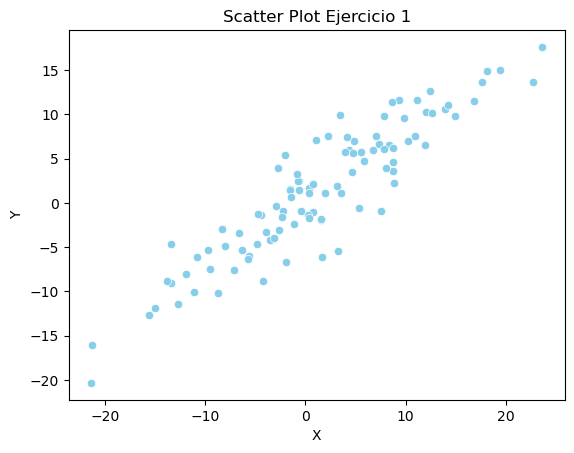

In [250]:
graficar(datos1, 'X', 'Y', 'Ejercicio 1')

Hallamos la recta que mejor aproxima los datos

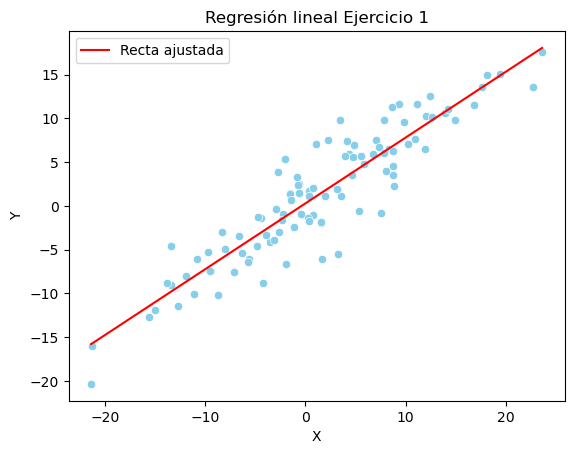

In [251]:
graficar_recta(datos1, 'X', 'Y', 'Ejercicio 1')

Repetimos los pasos anteriores considerando los puntos {($x_i$, $y_i$ + 12) con i = 1...n}, donde ($x_i$, $y_i$) eran los puntos originales.

In [252]:
datos1c = datos1.copy()

for index, row in datos1c.iterrows():
    row['Y'] += 12

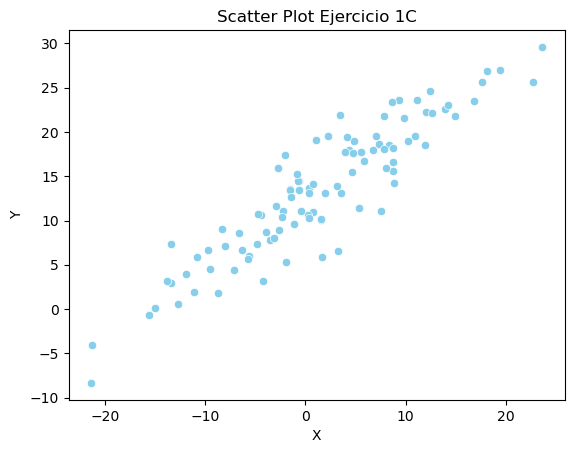

In [253]:
graficar(datos1c, 'X', 'Y', 'Ejercicio 1C')

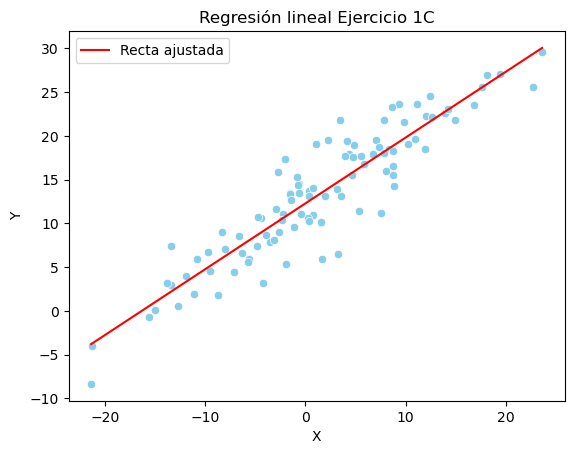

In [254]:
graficar_recta(datos1c, 'X', 'Y', 'Ejercicio 1C')

### Ejercicio 2

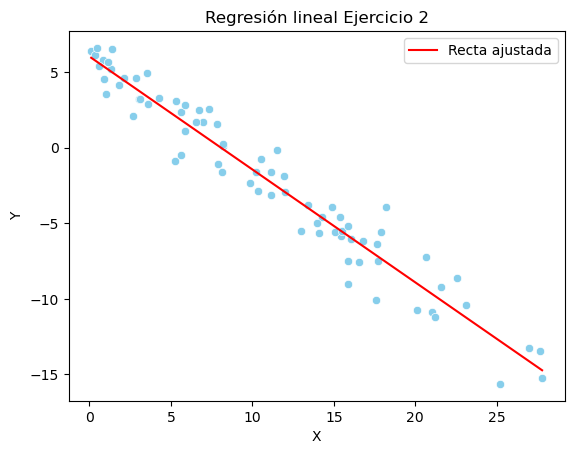

In [255]:
graficar_recta(datos2, 'X', 'Y',  'Ejercicio 2')

### Ejercicio 3

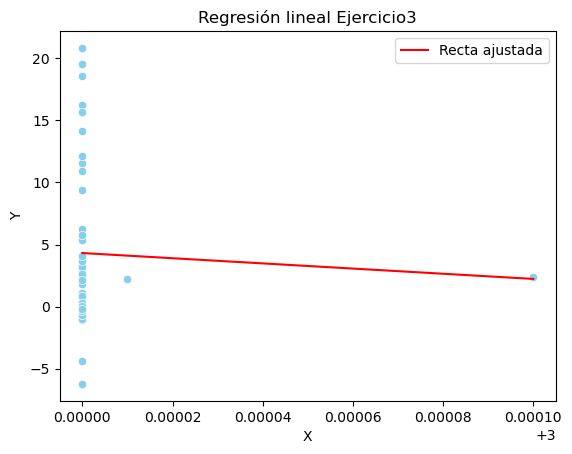

In [256]:
graficar_recta(datos3, 'X', 'Y', 'Ejercicio3')

Calculamos el determinante de $X^T$ $X$

In [257]:
X = datos3['X'].values.reshape(-1,1)

X = np.hstack([np.ones((X.shape[0],1)), X])

XtX = (X.T) @ X

det = np.linalg.det(XtX)

print(det)
print(round(det))

4.82800678337867e-07
0


Calculamos el determinante para los datos de los ejercicios 1 y 2

In [258]:
X = datos1['X'].values.reshape(-1,1)

X = np.hstack([np.ones((X.shape[0],1)), X])

XtX = (X.T) @ X

det = np.linalg.det(XtX)

print(det)
print(round(det))

825537.5321342533
825538


In [259]:
X = datos2['X'].values.reshape(-1,1)

X = np.hstack([np.ones((X.shape[0],1)), X])

XtX = (X.T) @ X

det = np.linalg.det(XtX)

print(det)
print(round(det))

316795.0348723668
316795


### Ejercicio 4

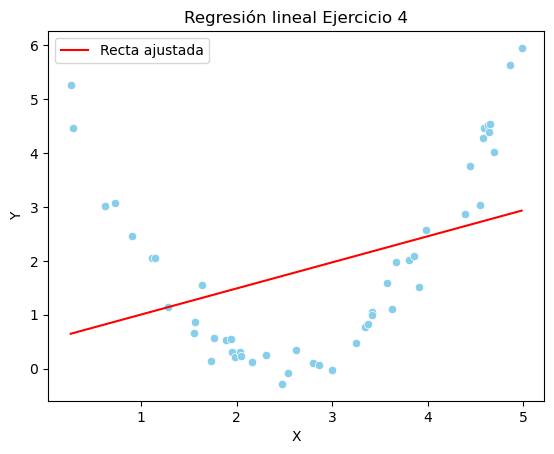

In [260]:
graficar_recta(datos4, 'x_vector', 'y_error', 'Ejercicio 4')

En este caso utilizaremos una curva en vez de una recta para aproximar los datos.

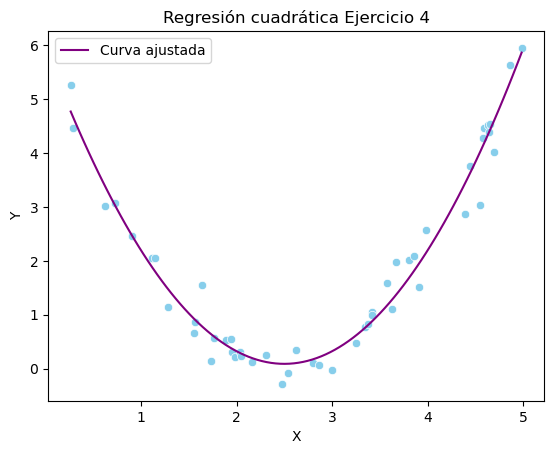

In [261]:
graficar_curva(datos4, 'x_vector', 'y_error', 'Ejercicio 4')

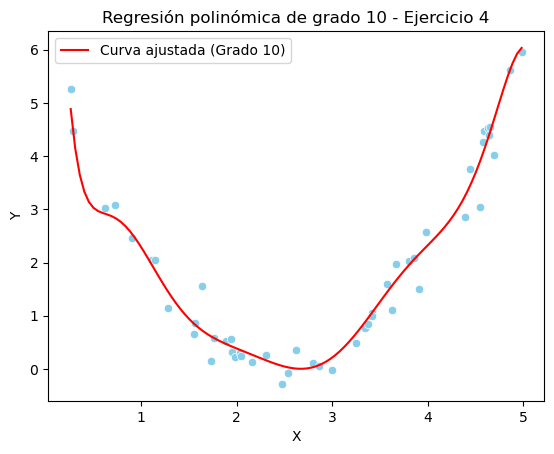

In [262]:
graficar_recta_polinomial(datos4, 'x_vector', 'y_error', 'Ejercicio 4', 10)

# Tercera Parte

In [263]:
student_performance = pd.read_csv('student_performance.csv')

Separamos los datos en conjuntos de $\underline{entrenamiento}$ y $\underline{testeo}$

In [264]:
train = pd.read_csv('student_performance.csv', nrows=450)
test = pd.read_csv('student_performance.csv', skiprows=range(1,451))

In [265]:
train

,X1 Hours Studied,X2 Previous Scores,X3 Extracurricular Activities,X4 Sleep Hours,X5 Sample Question Papers Practiced,Y Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
445,3,56,0,7,6,36.0
446,9,98,0,6,7,96.0
447,1,82,1,9,4,62.0
448,1,47,0,9,2,22.0


In [266]:
test

,X1 Hours Studied,X2 Previous Scores,X3 Extracurricular Activities,X4 Sleep Hours,X5 Sample Question Papers Practiced,Y Performance Index
0,9,84,0,6,6,79.0
1,6,92,0,7,3,82.0
2,3,75,1,5,8,55.0
3,1,46,1,4,3,22.0
4,4,85,1,5,9,70.0
...,...,...,...,...,...,...
145,5,99,0,7,5,89.0
146,3,85,0,9,7,65.0
147,1,76,1,4,2,49.0
148,5,60,0,9,0,48.0


Usamos los datos de train para estimar $\hat{\beta_0}$, ... , $\hat{\beta_5}$

In [267]:
# Separamos las variables predictoras (X1, ..., X5) y la variable a predecir (Y)
X_train = train.drop(columns='Y Performance Index').to_numpy()  
Y_train = train['Y Performance Index'].to_numpy().reshape(-1, 1) 

X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))

# Usamos la fórmula que obtuvimos en la parte 1
beta_estimados = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train

# Guardamos los coeficientes estimados en un diccionario 
betas = dict()
for i in range(len(beta_estimados)):
    betas[f'Beta_{i}'] = float(beta_estimados[i][0])

betas

{'Beta_0': -34.470322275015846,
 'Beta_1': 2.867108200658482,
 'Beta_2': 1.0235029752682696,
 'Beta_3': 0.5577888608665669,
 'Beta_4': 0.4623469612316101,
 'Beta_5': 0.20686477319049779}

A partir de los valores estimados de los coeficientes, calculamos $\hat{y_i}$ como:
$$
\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} X1_i + \hat{\beta_2} X2_i + \hat{\beta_3} X3_i + \hat{\beta_4} X4_i + \hat{\beta_5} X5_i
$$

En notación matricial:
$$
\hat{y} = X \hat{\beta}
$$
Siendo X el array que contiene los datos de entrenamiento (excluyendo la variable a predecir), y $\hat{\beta}$ el array de betas obtenido.

In [268]:
y_estimada_train = X_train @ beta_estimados

In [269]:
res_train = train[['Y Performance Index']].copy()
res_train['Y Estimada'] = y_estimada_train.flatten()
res_train

,Y Performance Index,Y Estimada
0,91.0,91.852006
1,65.0,63.188472
2,45.0,44.873142
3,36.0,36.370627
4,66.0,67.095258
...,...,...
445,36.0,35.924786
446,96.0,95.859078
447,62.0,57.870401
448,22.0,21.076278


Definimos el error cuadrático medio (ECM) como el promedio de los errores (la diferencia entre la realidad y la predicción para cada observación) al cuadrado:

$$
ECM = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Calculamos ECM para los datos de train

In [270]:
n = res_train.shape[0]
sumatoria = 0
for index, row in res_train.iterrows():
        sumatoria += (row['Y Performance Index'] - row['Y Estimada']) ** 2
ecm_train = sumatoria / n

float(ecm_train)

3.6009036870388864

Repetimos los pasos para el conjunto de testeo

In [271]:
X_test = test.drop(columns='Y Performance Index').to_numpy()  
Y_test = test['Y Performance Index'].to_numpy().reshape(-1, 1) 

X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

# Estimamos Y con los betas obtenidos de training
y_estimada_test = X_test @ beta_estimados

In [272]:
res_test = test[['Y Performance Index']].copy()
res_test['Y Estimada'] = y_estimada_test.flatten()
res_test

,Y Performance Index,Y Estimada
0,79.0,81.323172
1,82.0,80.751624
2,55.0,55.418167
3,22.0,18.505694
4,70.0,68.727170
...,...,...
145,89.0,85.462766
146,65.0,66.737931
147,49.0,49.003918
148,48.0,45.436520


In [273]:
n = res_test.shape[0]
sumatoria = 0
for index, row in res_test.iterrows():
        sumatoria += (row['Y Performance Index'] - row['Y Estimada']) ** 2
ecm_test = sumatoria / n

float(ecm_test)

4.436433561918473

Cómo cambia el ECM de test si calculamos los coeficientes con todas las observaciones?

In [274]:
X_sp = student_performance.drop(columns='Y Performance Index').to_numpy()  
Y_sp = student_performance['Y Performance Index'].to_numpy().reshape(-1, 1) 

X_sp = np.column_stack((np.ones(X_sp.shape[0]), X_sp))

# Usamos la fórmula que obtuvimos en la parte 1
beta_estimados_sp = np.linalg.inv(X_sp.T @ X_sp) @ X_sp.T @ Y_sp

# Guardamos los coeficientes estimados en un diccionario 
betas_sp = dict()
for i in range(len(beta_estimados_sp)):
    betas_sp[f'Beta_{i}'] = float(beta_estimados_sp[i][0])

betas_sp

{'Beta_0': -33.95836743772129,
 'Beta_1': 2.8422556937118904,
 'Beta_2': 1.0198310553392607,
 'Beta_3': 0.611780373746357,
 'Beta_4': 0.44369872380689535,
 'Beta_5': 0.2112072561400731}

In [275]:
y_estimada_test2 = X_test @ beta_estimados_sp
res_test['Y Estimada 2'] = y_estimada_test.flatten()

In [276]:
# Calculamos también para el conjunto de entrenamiento para graficar el error
y_estimada_train2 = X_train @ beta_estimados_sp
res_train['Y Estimada 2'] = y_estimada_train2.flatten()

In [277]:
errores = []

for index, row in res_train.iterrows():
        error_abs = abs(row['Y Performance Index'] - row['Y Estimada 2'])
        errores.append(error_abs)
for index, row in res_test.iterrows():
        error_abs = abs(row['Y Performance Index'] - row['Y Estimada 2'])
        errores.append(error_abs)

errores.sort()

Creamos un histograma para mostrar la distribución de los errores

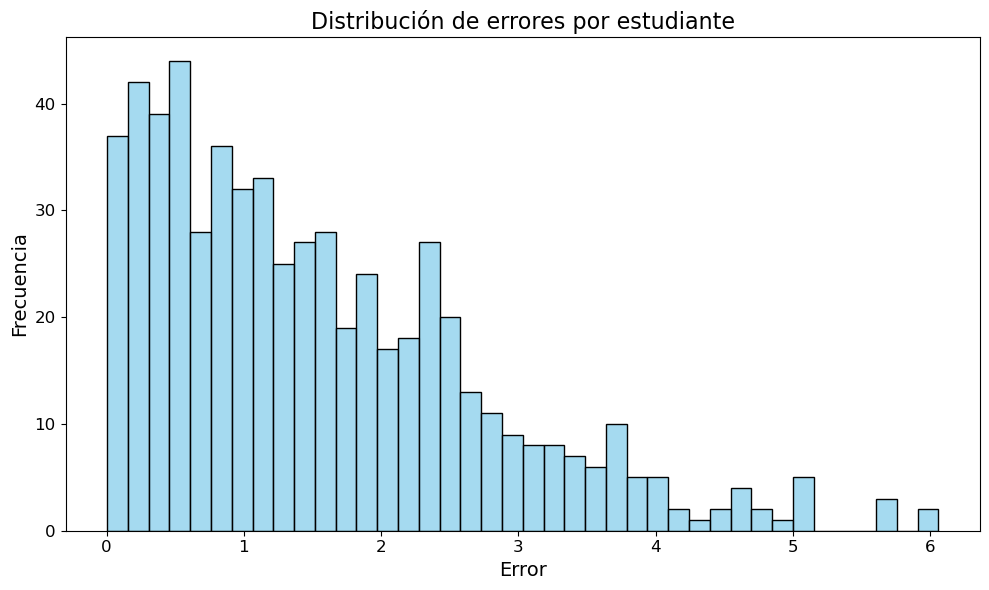

In [278]:
plt.figure(figsize=(10, 6))  
sns.histplot(errores, bins=40, color='skyblue', edgecolor='black')
plt.title('Distribución de errores por estudiante', fontsize=16)
plt.xlabel('Error', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()